In [1]:
from brain2kg.text2kg.eda_pipeline import EDA

[nltk_data] Downloading package punkt to /Users/jamino/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/Users/jamino/Library/Caches/pypoetry/virtualenvs/brain2kg-saEV5tpU-py3.12/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [2]:
open('examples.log', 'w').close() # clear local log

In [3]:
input_raw_text = open('data/webnlg_dataset.txt').read()

# use 100 random webnlg dataset examples
import random
input_raw_text = input_raw_text.splitlines()
random.shuffle(input_raw_text)
input_raw_text = '\n'.join(input_raw_text[:200])

In [4]:
config = {
    # OIE
    'oie_llm': 'llama3.1',
    'oie_prompt_template_file_path': 'prompt_templates/oie_fsp_template.txt',
    'oie_few_shot_example_file_path': 'few_shot_examples/oie_few_shot_examples.txt',
    # SD
    'sd_llm': 'llama3.1',
    'sd_prompt_template_file_path': 'prompt_templates/sd_fsp_template.txt',
    'sd_few_shot_example_file_path': 'few_shot_examples/sd_few_shot_examples.txt',
    # SA
    'sa_target_schema_file_path': 'schemas/webnlg_schema.csv',
    'sa_llm': 'llama3.1',
    'sa_embedding_model': 'sentence-transformers/all-MiniLM-L6-v2',
    'sa_prompt_template_file_path': 'prompt_templates/sa_template.txt'
}
eda = EDA(**config)

In [5]:
output_kg_list = eda.extract_kg(
    input_raw_text,
    output_dir='examples/outputs'
)

Aligning: 100%|██████████| 302/302 [12:12<00:00,  2.42s/it]


In [6]:
# Before
output_kg_list[0]

[[['Ciudad_Ayala', 'utcOffset', '−6'],
  ['Ciudad_Ayala', 'timeZone', 'Pacific_Daylight_time']],
 [['Mason_School_of_Business', 'location', 'Virginia'],
  ['Mason_School_of_Business', 'isTenantOf', 'Alan_B._Miller_Hall'],
  ['Mason_School_of_Business', 'country', 'United_States'],
  ['Alan_B._Miller_Hall', 'address', '101_Ukrop_Way']],
 [['The_building', 'architect', 'Robert_A_M_Stern']],
 [['Graco_Ramírez', 'isOfficialOf', 'Morelos']],
 [['Alan_Shepard', 'birthDate', 'November_18_1923'],
  ['Alan_Shepard', 'placeOfBirth', 'New_Hampshire'],
  ['Dianne_Feinstein', 'country', 'United_States'],
  ['Alan_Shepard', 'deathPlace', 'California'],
  ['Dianne_Feinstein', 'governmentType', 'Senator']],
 [['Liselotte_Grschebina', 'diedIn', 'Israel']],
 [['Liselotte_Grschebina', 'bornIn', 'Karlsruhe'],
  ['Liselotte_Grschebina', 'diedIn', 'Israel'],
  ['Israeli_Jews', 'ethnicGroup', 'Israeli_Jews']],
 [['Israel', 'ethnicGroup', 'Arab_citizens_of_Israel']],
 [['Piotr_Hallmann', 'bornIn', 'Gdynia_Pol

In [7]:
# After
output_kg_list[1]

[[['Ciudad_Ayala', 'utcOffset', '−6'],
  ['Ciudad_Ayala', 'timeZone', 'Pacific_Daylight_time']],
 [['Mason_School_of_Business', 'location', 'Virginia'],
  ['Mason_School_of_Business', 'tenant', 'Alan_B._Miller_Hall'],
  ['Mason_School_of_Business', 'country', 'United_States'],
  ['Alan_B._Miller_Hall', 'address', '101_Ukrop_Way']],
 [['The_building', 'architect', 'Robert_A_M_Stern']],
 [['Graco_Ramírez', 'office', 'Morelos']],
 [['Alan_Shepard', 'birthDate', 'November_18_1923'],
  ['Alan_Shepard', 'birthPlace', 'New_Hampshire'],
  ['Dianne_Feinstein', 'country', 'United_States'],
  ['Alan_Shepard', 'deathPlace', 'California'],
  ['Dianne_Feinstein', 'type', 'Senator']],
 [['Liselotte_Grschebina', 'deathPlace', 'Israel']],
 [['Liselotte_Grschebina', 'origin', 'Karlsruhe'],
  ['Liselotte_Grschebina', 'deathPlace', 'Israel'],
  ['Israeli_Jews', 'ethnicGroup', 'Israeli_Jews']],
 [['Israel', 'ethnicGroup', 'Arab_citizens_of_Israel']],
 [['Piotr_Hallmann', 'birthPlace', 'Gdynia_Poland'],
  [

/Users/jamino/BrainKB/brain2kg/text2kg/kg_grapher.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


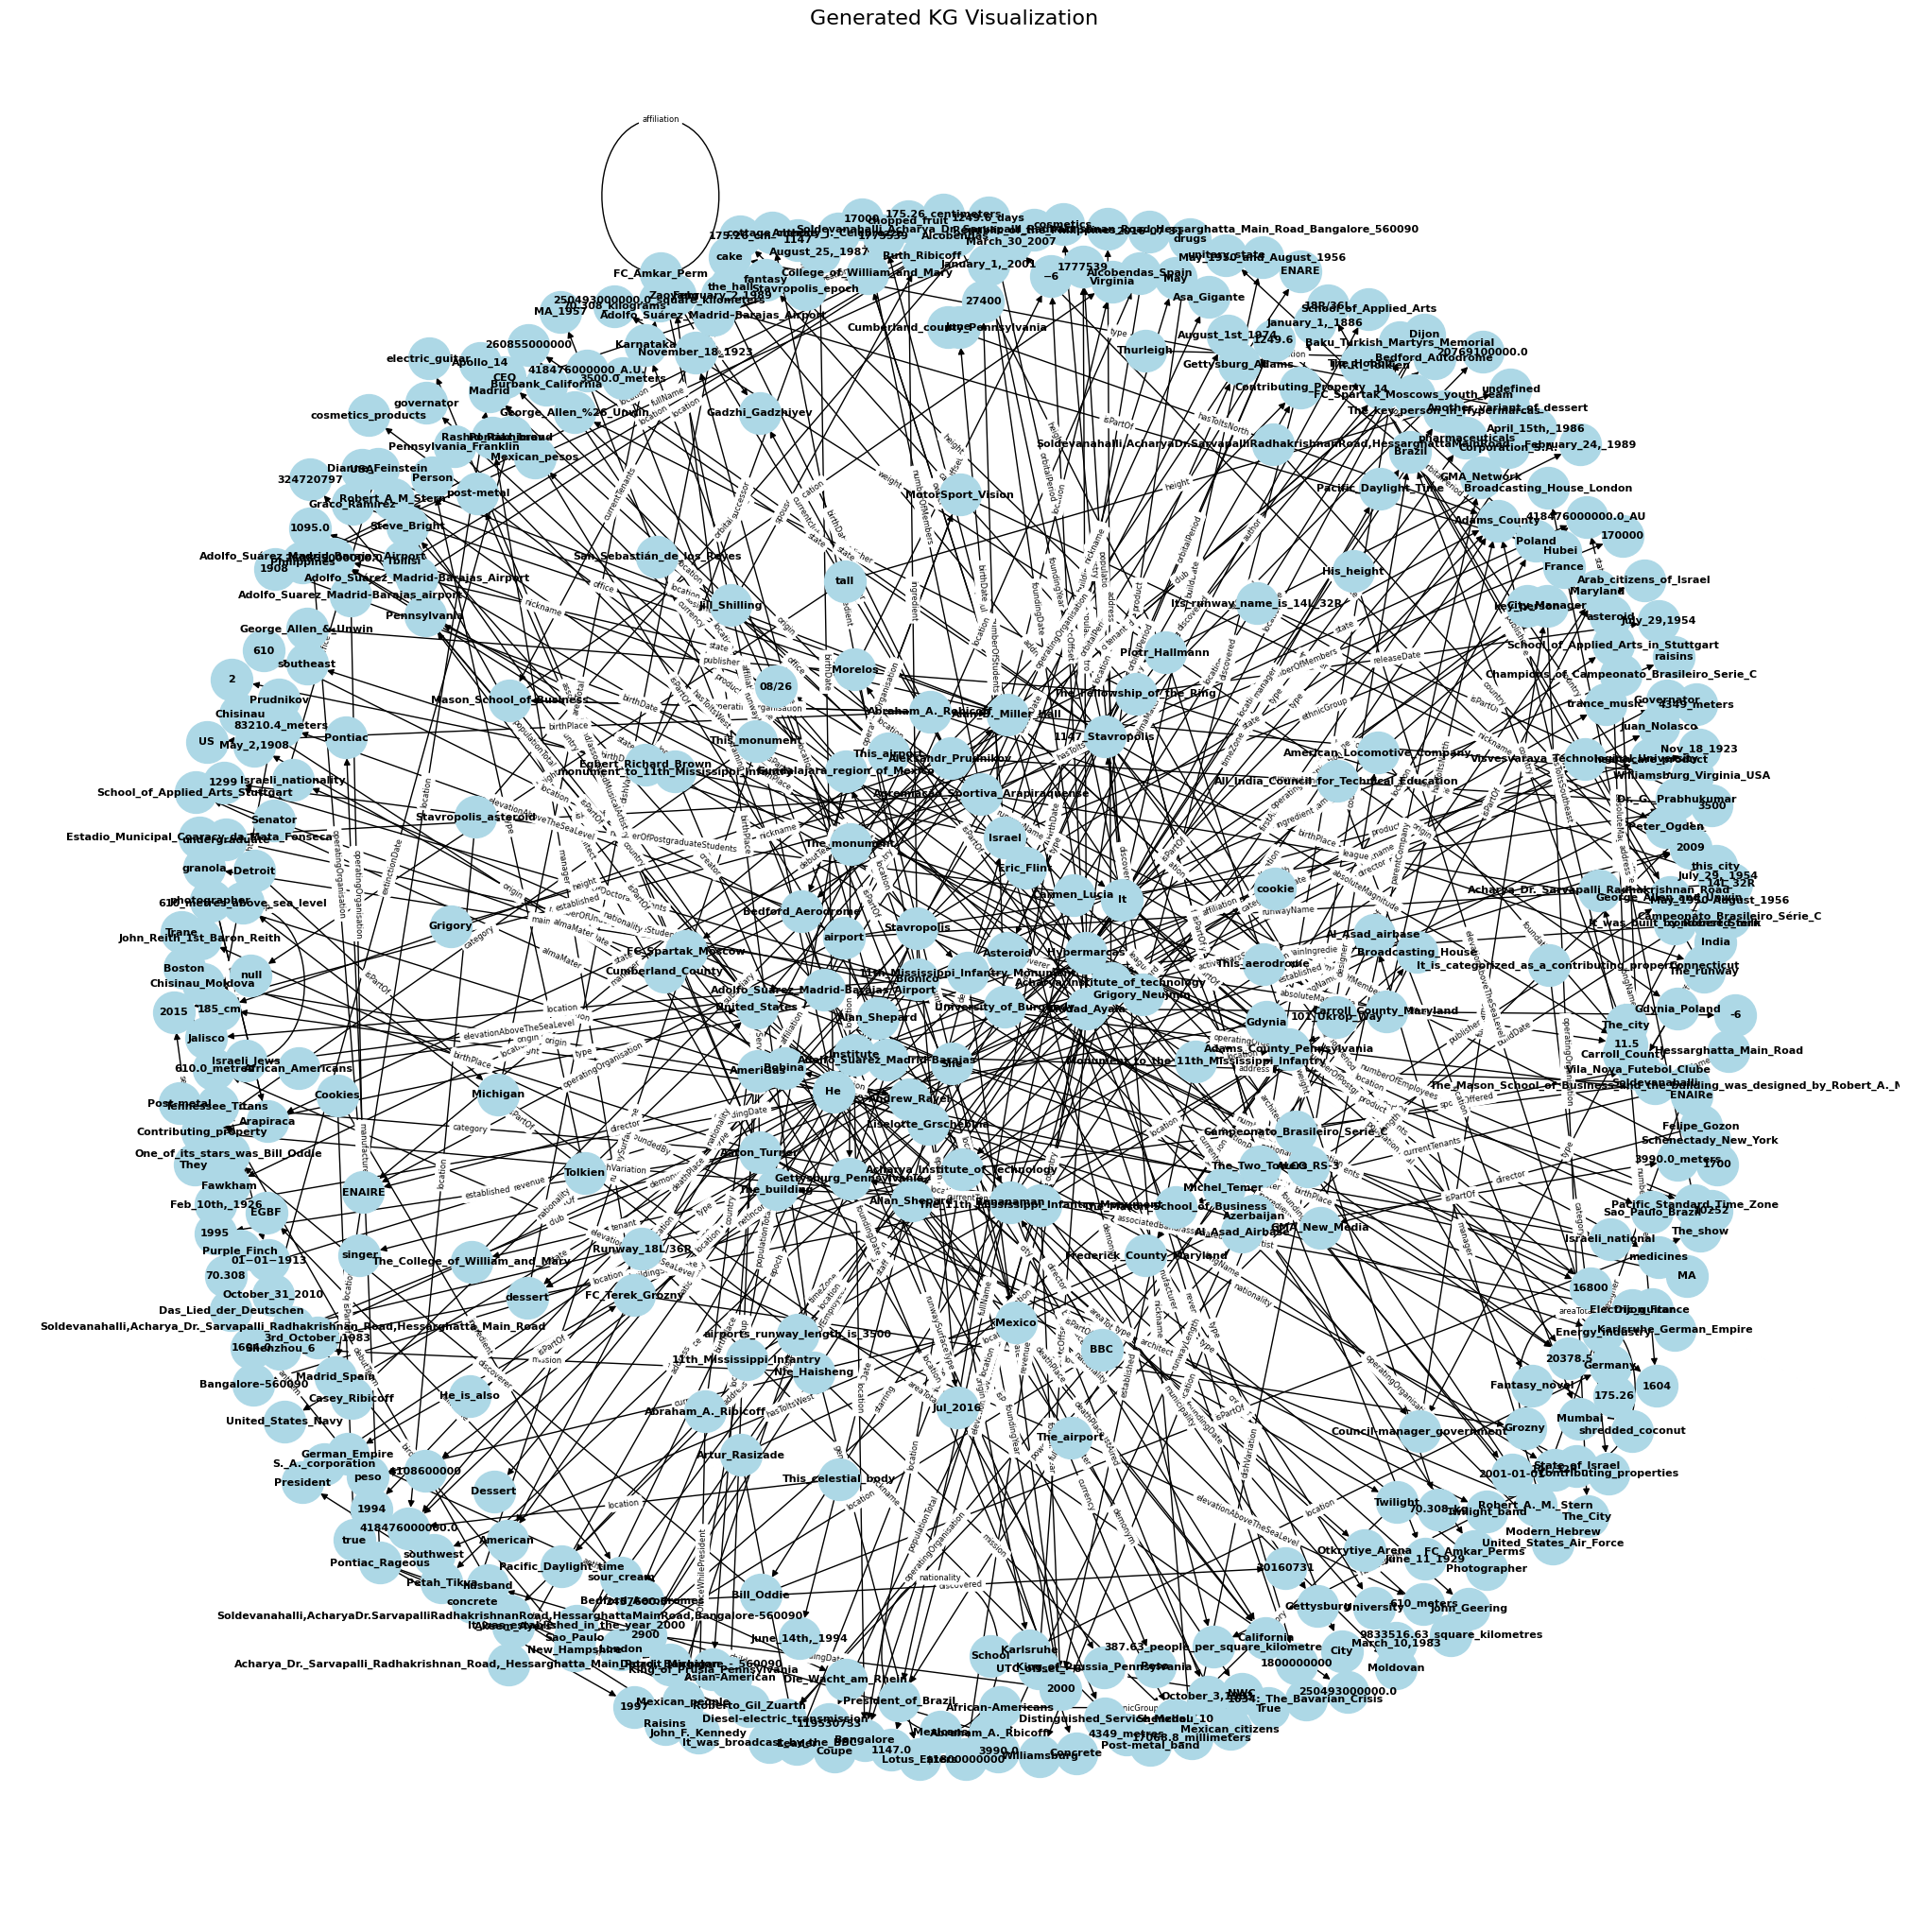

In [8]:
from brain2kg.text2kg.kg_grapher import KGVisualizer
# grapher
final_triplets = output_kg_list[1]
kgv = KGVisualizer(final_triplets)
kgv.graph_kg()